In [1]:
from kwantrl.simulations.pixel_array import pixelarrayQPC
from kwantrl.optimization.trajectory_optimization import trajectory_func_to_optimize
from kwantrl.optimization.cma import optimize_cma
from kwantrl.lossfunctions.staircasiness import staircasiness
from kwantrl.datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']=100
mpl.rcParams["figure.facecolor"]='white'
mpl.rcParams["axes.facecolor"]='white'
mpl.rcParams["savefig.facecolor"]='white'

In [2]:
start=-3
stop=4
steps=200

# Parameters for QPC
disorder=0.15
outer_gates=-3
B_field=0
energy=1

# # Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# # Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
plot_systems=False
W=70
L=120
QPC=pixelarrayQPC(W=W,L=L,plot=plot_systems,gate_kwargs={'scale':1})


In [3]:
path_to_data='/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data'
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.window_loss,'bounds':(-5,4),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
# ?actual_func_to_minimize
result,es,run_id=optimize_cma(actual_func_to_minimize,datahandler(data_path=path_to_data),start_point,maxfevals=99999,sigma=0.5,stop_time=100,QPC=QPC)

data saved to:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/42/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=706665, Thu Apr 21 17:37:12 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 1.039379477078047e+00 1.0e+00 4.78e-01  5e-01  5e-01 5:02.2
termination on timeout=100 (Thu Apr 21 17:42:37 2022)
final/bestever f-value = 1.003012e+00 1.003012e+00
incumbent solution: [ 0.19463151 -0.24524141  0.04830309  0.06873566  0.05226514  0.3583048
  0.28287491  0.17502455 ...]
std deviations: [0.47788229 0.47658107 0.47651885 0.47342816 0.47545859 0.47041707
 0.47743746 0.47868646 ...]


(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'CMA-id:42, result'}, xlabel='$V_{avg}$ [V]', ylabel='Conductance'>)

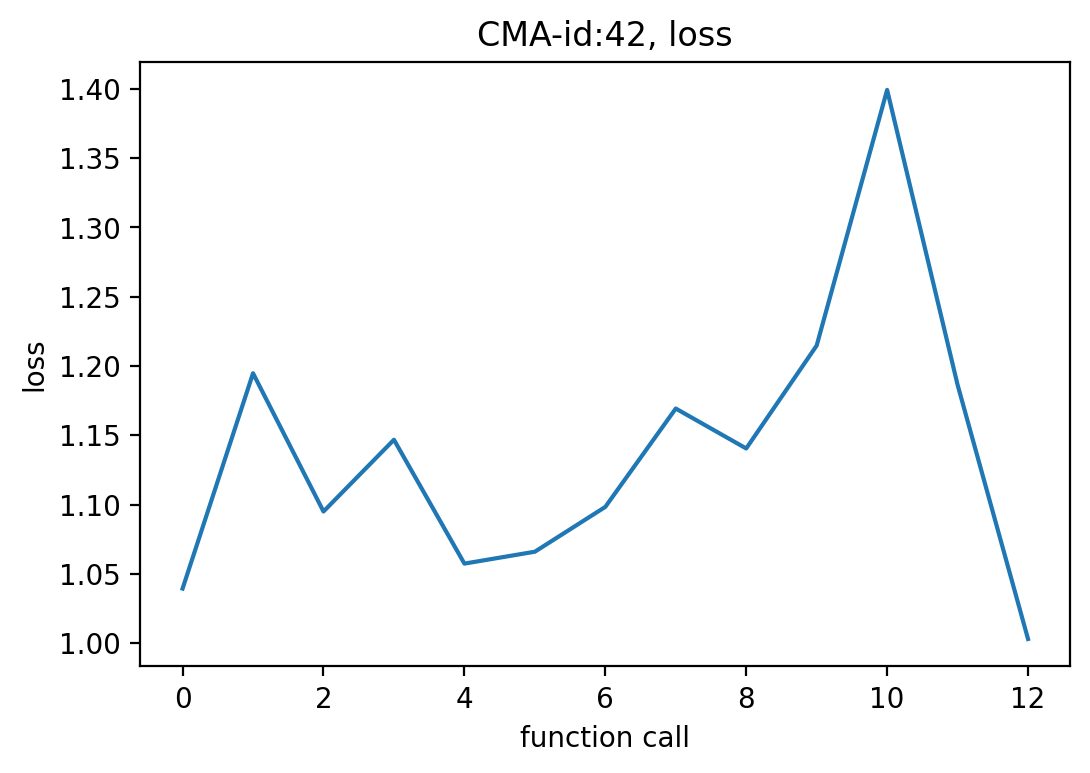

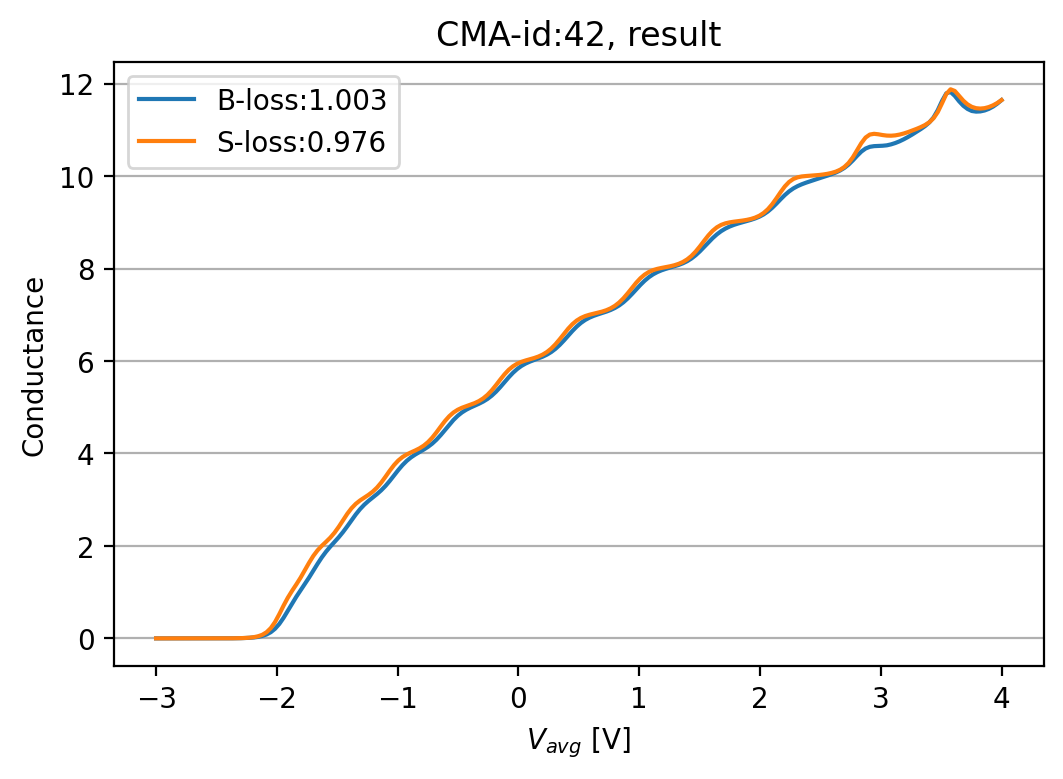

In [4]:
from kwantrl.plotting.plotting import plotter_class
import numpy as np
plotter=plotter_class(run_id,data_path=path_to_data,legacy_data=True) #,data_path='C:/Users/Torbjørn/Downloads/')#run_id)
# print(np.array(plotter.data['voltages'][0]).shape)
plotter.loss()
plotter.result()
# plotter.plot_wave_func([-2,-1.3,-0.5,0.5])
# plotter.plot_wave_func(-1.3,QPC)
# plotter.plot_wave_func(-0.5,QPC)
# plotter.plot_wave_func(0.5,QPC)

In [5]:
# run_id=17
# dater=datahandler(data_path='C:/Users/Torbjørn/Downloads/')
# dataset,_=dater.load_transformed_data(run_id)

In [6]:
# best_voltages=np.array(dataset['voltages'][np.argmin(dataset['loss'])])
# import matplotlib.pyplot as plt
# labels=[str(i+1) for i in range(9)]
# colors=[]
# fig,axes=plt.subplots(1,2)
# ax=axes[0]
# ax2=axes[1]
# for i in range(9):
#     p=ax.plot(dataset['xaxis'][0],best_voltages[:,i],label=labels[i])
#     colors.append(p[0].get_color())
# ax.set_xlabel(r"$V_{avg} \ [V]$")
# ax.set_ylabel(r"$V_{pix} \ [V]$")
# ax.legend()
# ax.grid()

# from matplotlib.collections import PatchCollection
# from matplotlib.patches import Rectangle

# ax2.set_xlim(0,3)
# ax2.set_ylim(0,3)
# for i in range(3):
#     for j in range(3):
#         rect=Rectangle((j+0.25,i+0.25),0.5,0.5)
#         pc=PatchCollection([rect],facecolor=colors[i*3+j])
#         ax2.text(x=j+0.26,y=i+0.26,s=str(i*3+j))
#         ax2.add_collection(pc)
# ax2.axes.xaxis.set_visible(False)
# ax2.axes.yaxis.set_visible(False)
# plt.tight_layout()

